In [1]:
import numpy as np
import matplotlib.pyplot as plt
from toolbag import *

In [2]:
wordbag = WordBag()
wordbag.read_movie_reviews()

In [3]:
# extract data
print(wordbag.data.shape)

(2000, 50920)


In [4]:
wordbag.update(count=200)

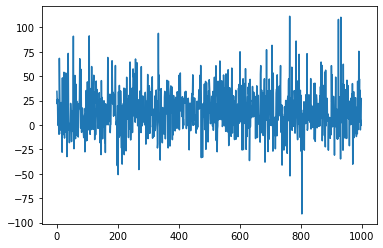

In [5]:
pos_results = []
for i in range(1000):
    pos_results.append(wordbag.score_file("reviews/pos/{}.txt".format(i)))
pos_results = np.array(pos_results)
plt.plot(pos_results)


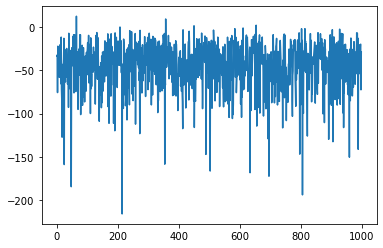

In [6]:
neg_results = []
for i in range(1000):
    neg_results.append(wordbag.score_file("reviews/neg/{}.txt".format(i)))
neg_results = np.array(neg_results)
plt.plot(neg_results)

In [7]:
pos_hits = pos_results[pos_results >= 0.5]
neg_hits = neg_results[neg_results < 0.5]

print(pos_hits.shape[0] / pos_results.shape[0])
print(neg_hits.shape[0] / neg_results.shape[0])

0.741
0.996


In [8]:
flipped_words = {value:key for key, value in wordbag.seen_words.items()}
sorted_wieghts = np.sort(wordbag.word_weights)

In [9]:
# get the indecies of the positive words
indecies = []
for weight in sorted_wieghts[-20:]:
    indecies.append(np.where(wordbag.word_weights == weight)[0][0])
print(indecies)

[57, 2773, 1337, 1112, 14, 2145, 1864, 306, 221, 749, 579, 1923, 761, 553, 4255, 243, 971, 160, 331, 132]


In [10]:
# get the positive words
positive_words = []
for index in indecies:
    positive_words.append(flipped_words[index])
print(positive_words)

['life', 'true', 'yet', 'many', 'see', 'different', 'quite', 'especially', 'great', 'perfect', 'job', 'seen', 'others', 'well', 'hilarious', 'performances', 'very', 'also', 'best', 'both']


In [11]:
indecies = []
for weight in sorted_wieghts[:20]:
    indecies.append(np.where(wordbag.word_weights == weight)[0][0])
print(indecies)

[445, 1548, 614, 309, 745, 964, 1495, 736, 4560, 616, 5357, 2803, 88, 4182, 229, 1554, 401, 3097, 4147, 2678]


In [12]:
negative_words = []
for index in indecies:
    negative_words.append(flipped_words[index])
print(negative_words)

['bad', 'worst', 'script', 'nothing', 'plot', 'unfortunately', 'boring', 'supposed', 'stupid', 'should', 'awful', 'mess', 'only', 'ridiculous', 'looks', 'wasted', 'have', 'waste', 'poor', 'why']


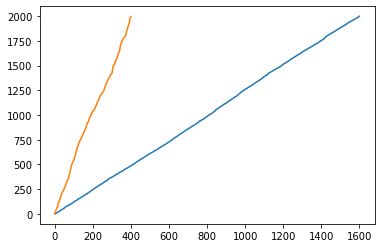

In [13]:
train_size = 1600
test_size = 2000 - train_size
file_numbers = np.arange(2000)
subgroup = random_subgroup(file_numbers, subgroup_size=train_size)
train_IDs = np.sort(subgroup)

test_IDs = np.copy(file_numbers)
for ID in train_IDs:
    test_IDs[ID] = -1
test_IDs = test_IDs[test_IDs != -1]

plt.plot(train_IDs)
plt.plot(test_IDs)

In [14]:
# train word bag 2
wordbag2 = WordBag()

for ID in train_IDs:
    positive = True
    if ID >= 1000:
        ID -= 1000
        positive = False
    
    if positive:
        file_name = "reviews/pos/{}.txt".format(ID)
        wordbag2.read_file(file_name, 1)
    else:
        file_name = "reviews/neg/{}.txt".format(ID)
        wordbag2.read_file(file_name, 0)


In [15]:
wordbag2.vectorize_data()
wordbag2.set_weights()

In [16]:
wordbag2.update(count=200)

In [17]:
print(wordbag2.data.shape)

(1600, 45746)


In [18]:
# test word bag 2
positive_scores = []
negative_scores = []

for ID in test_IDs:
    positive = True
    if ID >= 1000:
        ID -= 1000
        positive = False

    if positive:
        file_name = "reviews/pos/{}.txt".format(ID)
        positive_scores.append(wordbag2.score_file(file_name))
    else:
        file_name = "reviews/neg/{}.txt".format(ID)
        negative_scores.append(wordbag2.score_file(file_name))

positive_scores = np.array(positive_scores)
negative_scores = np.array(negative_scores)

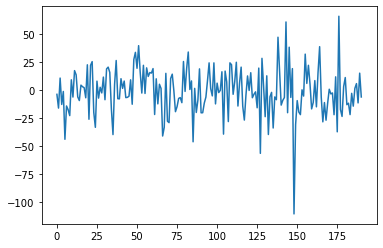

In [19]:
plt.plot(positive_scores)

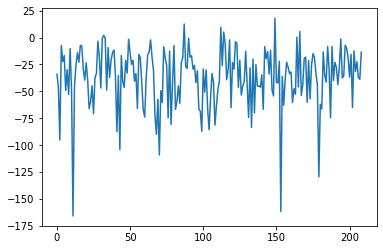

In [20]:
plt.plot(negative_scores)

In [21]:
positive_hits = positive_scores[positive_scores >= 0.5]
negative_hits = negative_scores[negative_scores < 0.5]

print(positive_hits.shape[0] / positive_scores.shape[0])
print(negative_hits.shape[0] / negative_scores.shape[0])

0.450261780104712
0.9712918660287081


In [22]:
# train wordbag 3
wordbag3 = WordBag()
wordbag3.read_movie_reviews()

In [23]:
wordbag3.update_ridge_regularization(count=200)

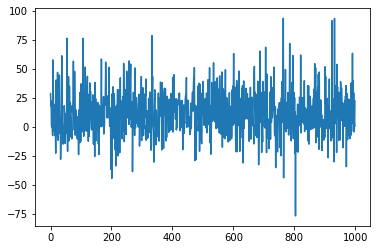

In [24]:
pos_results = []
for i in range(1000):
    pos_results.append(wordbag3.score_file("reviews/pos/{}.txt".format(i)))
pos_results = np.array(pos_results)
plt.plot(pos_results)

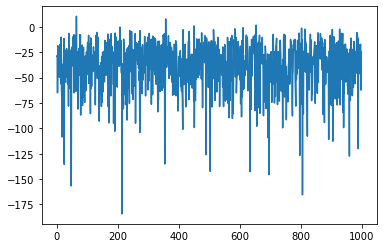

In [25]:
neg_results = []
for i in range(1000):
    neg_results.append(wordbag3.score_file("reviews/neg/{}.txt".format(i)))
neg_results = np.array(neg_results)
plt.plot(neg_results)

In [26]:
pos_hits = pos_results[pos_results >= 0.5]
neg_hits = neg_results[neg_results < 0.5]

print(pos_hits.shape[0] / pos_results.shape[0])
print(neg_hits.shape[0] / neg_results.shape[0])

0.732
0.996
